<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/Tabular-Playground-Series-Mar-2022/TPS-March-2022-Model.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requierment

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tabular-playground-series-jan-2022

mkdir: cannot create directory ‘/root/.kaggle’: File exists
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile

zipfile = zipfile.ZipFile('/content/train.csv.zip','r')
zipfile.extractall()
zipfile.close()

In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/train.csv',parse_dates=['date'])
test = pd.read_csv('/content/test.csv',parse_dates=['date'])
sub = pd.read_csv('/content/sample_submission.csv')

# First Look

In [4]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26298 non-null  int64         
 1   date      26298 non-null  datetime64[ns]
 2   country   26298 non-null  object        
 3   store     26298 non-null  object        
 4   product   26298 non-null  object        
 5   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.2+ MB


In [6]:
for col in range(2,5):
  print(train.iloc[:,col].value_counts())
  print("##############################")

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64
##############################
KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64
##############################
Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64
##############################


In [7]:
train.isnull().any()

row_id      False
date        False
country     False
store       False
product     False
num_sold    False
dtype: bool

In [8]:
train.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


# EDA

(array([1.4779e+04, 7.4220e+03, 2.7990e+03, 9.1100e+02, 2.6700e+02,
        8.3000e+01, 2.3000e+01, 1.0000e+01, 1.0000e+00, 3.0000e+00]),
 array([  70. ,  351.4,  632.8,  914.2, 1195.6, 1477. , 1758.4, 2039.8,
        2321.2, 2602.6, 2884. ]),
 <a list of 10 Patch objects>)

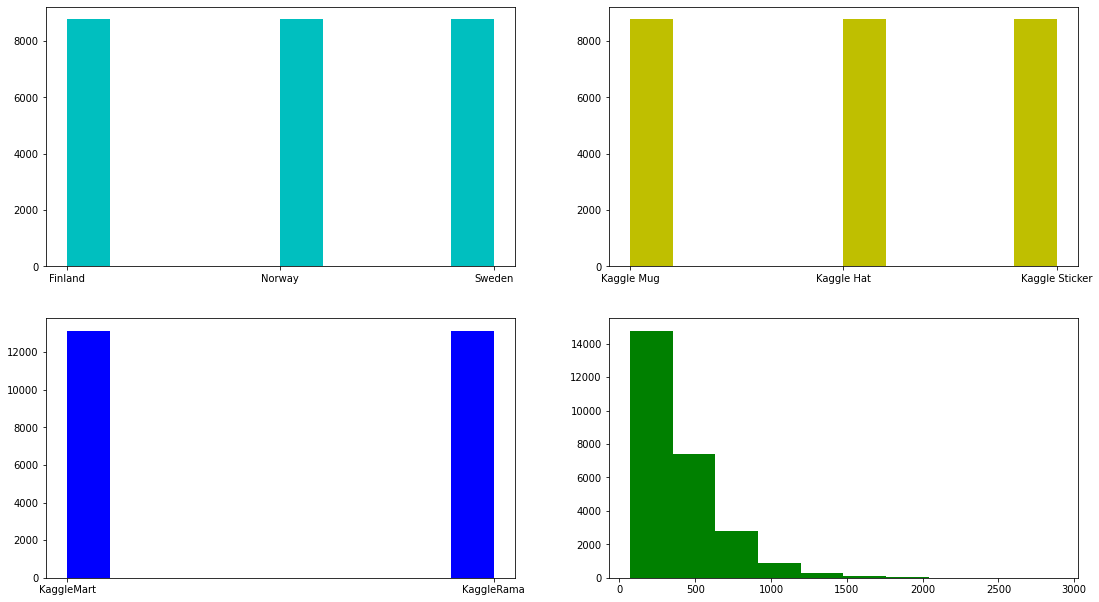

In [9]:
import matplotlib.pyplot as plt

fig,axis= plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5)
axis[0,0].hist(train['country'],color='c')
axis[0,1].hist(train['product'],color='y')
axis[1,0].hist(train['store'],color='blue')
axis[1,1].hist(train['num_sold'].values,color='green')

<Figure size 432x288 with 0 Axes>

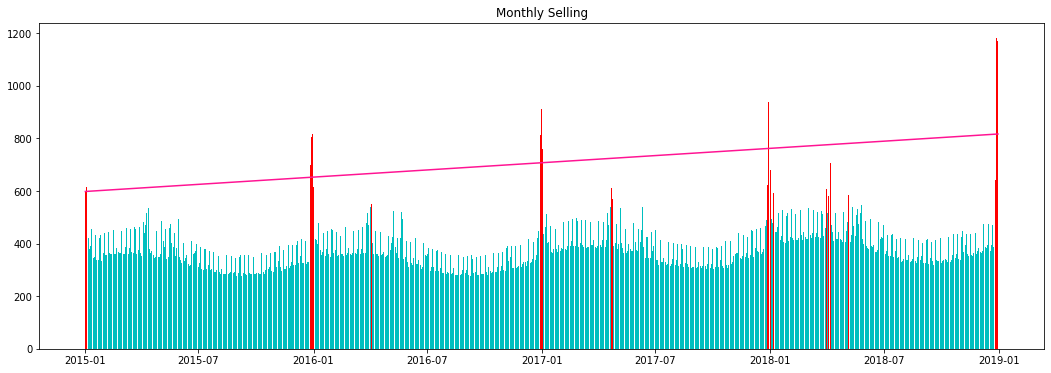

In [10]:
avrg_of_dates = train.groupby(train.date.dt.date)['num_sold'].mean()
avrg_figure = plt.figure()
plt.figure(figsize=(18, 6))
plt.title('Monthly Selling')
plt.bar(avrg_of_dates.index,avrg_of_dates,color=['c' if con <= 550 else 'r' for con in avrg_of_dates[range(avrg_of_dates.shape[0])]])
plt.plot([avrg_of_dates.index[0],avrg_of_dates.index[-1]],[avrg_of_dates.iloc[0],avrg_of_dates.iloc[-1]],color='deeppink')

In [11]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
train_daily = train.set_index('date').groupby([pd.Grouper(freq='D')])[['num_sold']].mean()
train_daily = train_daily.reset_index()

fig = px.line(train_daily,
              x="date",
              y= 'num_sold',
              color_discrete_sequence =['indianred'])

fig.update_xaxes(
        tickfont = dict(size=15, family = 'monospace', color ='#d4c43b'),
        tickmode = 'array',
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')


fig.update_yaxes(
        tickfont = dict(size=15, family = 'monospace', color ='#d4c43b'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width= 1.2,
                  opacity=0.6,
                  )

fig.update_layout(font = dict(color='#d4c43b', family = 'monospace'),
                  title = dict(text = 'Monthly-Selling trend',
                               x = 0.5, y =0.985,
                               font = dict(size = 22
                               )),
                  plot_bgcolor='#384543',
                  paper_bgcolor = '#384543',
                  showlegend = False)

fig.show()

In [12]:
year_changes = []
year_changes.append(train.loc[(train.date.dt.year == 2016)]['num_sold'].values.mean())
year_changes.append(train.loc[(train.date.dt.year == 2017)]['num_sold'].values.mean())
year_changes.append(train.loc[(train.date.dt.year == 2018)]['num_sold'].values.mean())

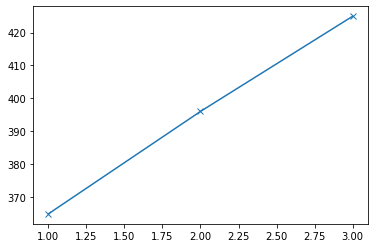

In [13]:
fig = plt.figure()
plt.plot(range(1,4),year_changes,marker='x')

In [15]:
test_data = year_changes.pop()
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(range(1,3)).reshape(2,1), np.array(year_changes).reshape(2,1))


In [16]:
test_data

424.9951293759513

In [17]:
next_year_change = reg.predict(np.array(3).reshape(1,1))[0][0] - year_changes[-1]
next_year_change

31.20419109880146

In [18]:
final_result = train.loc[(train.date.dt.year == 2017)]['num_sold'] + next_year_change


In [19]:
final_result

13158     467.204191
13159     760.204191
13160     219.204191
13161     778.204191
13162    1217.204191
            ...     
19723    1068.204191
19724     321.204191
19725    1219.204191
19726    1812.204191
19727     561.204191
Name: num_sold, Length: 6570, dtype: float64

<Figure size 432x288 with 0 Axes>

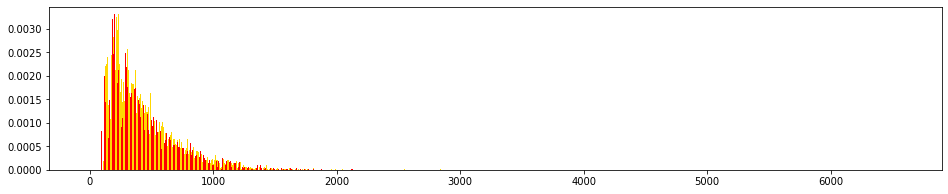

In [21]:
fig = plt.figure()
plt.figure(figsize=(16,3))
plt.hist(final_result,bins=np.linspace(-0.5, 6570, 1000),
         density=True, label='Train',
         color='#ffd700')
plt.hist(train.loc[(train.date.dt.year == 2018)]['num_sold'].values, np.linspace(-0.5, 6570.5, 1000),
         density=True, rwidth=0.5, label='Test predictions',
         color='r')
plt.show()

# TODO



*   Target is imbalanced , so **maybe** we should  balance.

*   Need Correlations for three values (store, product, country) cause those have same quntities and noy suitable for recognition.
*   We have missing values on dates! 2017/2018
* cheack sum of difrrences model!

